In [1]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
plt.style.use('fivethirtyeight')

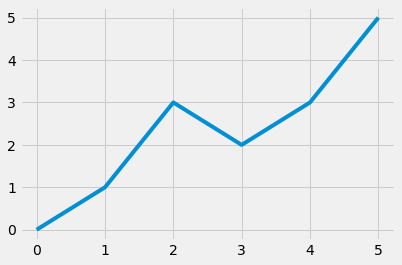

In [4]:
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

plt.plot(x_vals, y_vals)
plt.show()

In [6]:
# animation
x_vals = []
y_vals = []
index = count()

In [5]:
def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))

    plt.cla() # to fix animation with same color
    plt.plot(x_vals, y_vals)

In [10]:
# animation
x_vals = []
y_vals = []
index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))

    plt.cla() # to fix animation with same color
    plt.plot(x_vals, y_vals)
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000) # 1 second
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [11]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data9.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-12-311496f18bd3>", line 31, in animate
    ax.set_xlim(xlim_low, (x.max() + 5))
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 3185, in set_xlim
    right = self._validate_converted_limits(right, self.convert_xunits)
  File "/Library/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 3101, in _validate_

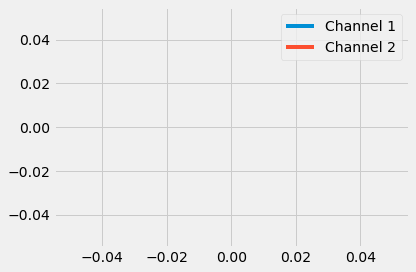

In [12]:
# Another way to do it without clearing the Axis
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot([], [], label='Channel 1')
plt.plot([], [], label='Channel 2')


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    ax = plt.gca()
    line1, line2 = ax.lines

    line1.set_data(x, y1)
    line2.set_data(x, y2)

    xlim_low, xlim_high = ax.get_xlim()
    ylim_low, ylim_high = ax.get_ylim()

    ax.set_xlim(xlim_low, (x.max() + 5))

    y1max = y1.max()
    y2max = y2.max()
    current_ymax = y1max if (y1max > y2max) else y2max

    y1min = y1.min()
    y2min = y2.min()
    current_ymin = y1min if (y1min < y2min) else y2min

    ax.set_ylim((current_ymin - 5), (current_ymax + 5))


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.legend()
plt.tight_layout()
plt.show()